<a href="https://colab.research.google.com/github/supriantositompul/Task-DataScience-StartupCampus/blob/main/DS04123_Suprianto_Dharma_Sitompul_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Module 2: Data Preprocessing**

##**Importing Libraries**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Importing Dataset**

Download Dataset pada: https://bit.ly/DatasetExerciseDSSC4

Run code di bawah untuk upload file, lalu choose file penguins_lter.csv dan penguins_size.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving penguins_lter.csv to penguins_lter.csv
Saving penguins_size.csv to penguins_size.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv'])) 
study_data = pd.read_csv(io.BytesIO(uploaded['penguins_lter.csv'])) 

Memanggil tabel data

In [ ]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

In [ ]:
data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


***
**Insight**
***
Berapa rata - rata body mass penguin? 

##**Handling Missing Values**

Cek jumlah missing value!

In [ ]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Drop missing value pada culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g!

In [ ]:
data.drop(data[data['body_mass_g'].isnull()].index,axis=0, inplace=True)

Mengisi missing value pada sex dengan modus!

In [ ]:
data['sex'] = data['sex'].fillna('MALE')

Pada baris ke 336 kolom sex, terdapat data berisi titik (.), drop baris data tersebut! 

In [ ]:
data.drop(data[data['sex']=='.'].index, inplace=True)

Cek kembali apakah masih ada missing value!

In [ ]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

***
**Insight**
***
Apakah masih terdapat missing value? 

##**Exploratory Data Analysis**

Tampilkan grafik yang menunjukkan jumlah tiap spesies pinguin!

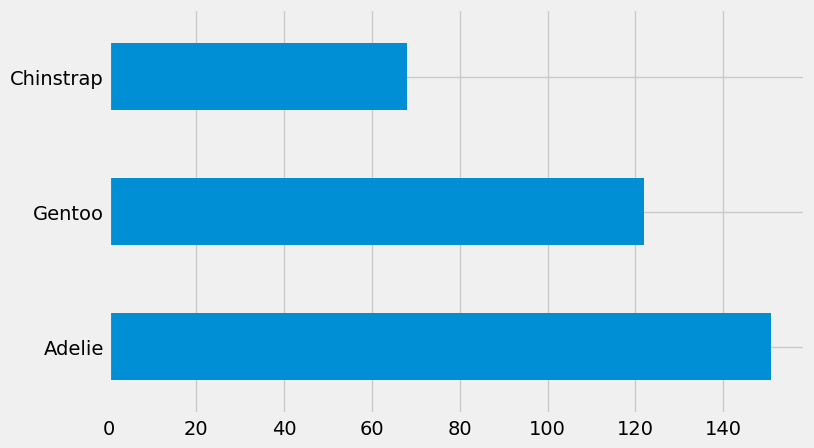

In [ ]:
data['species'].value_counts().plot(kind='barh')
plt.show()

***
**Insight**
***
Spesies apa dengan jumlah pinguin paling banyak? 

Tampilkan scatterplot yang menunjukkan korelasi antara culmen_length dan flipper_length!

culmen_length vs flipper_length


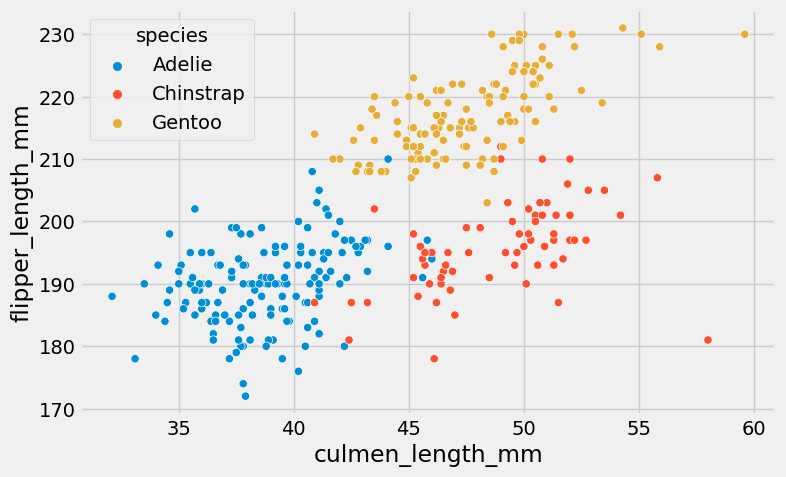

In [ ]:
print('culmen_length vs flipper_length')
sns.scatterplot(data=data, x='culmen_length_mm', y='flipper_length_mm', hue='species')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara culmen_length dan flipper_length?

Tampilkan scatterplot yang menunjukkan korelasi antara flipper_length dan body_mass!

flipper_length vs body_mass


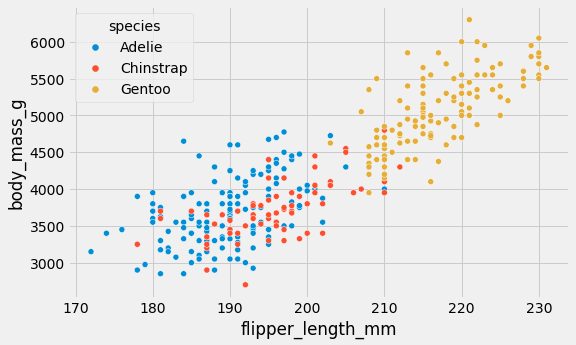

In [ ]:
print('flipper_length vs body_mass')
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara flipper_length dan body_mass?

Tampilkan pairplot dari semua variabel!

Pairplot


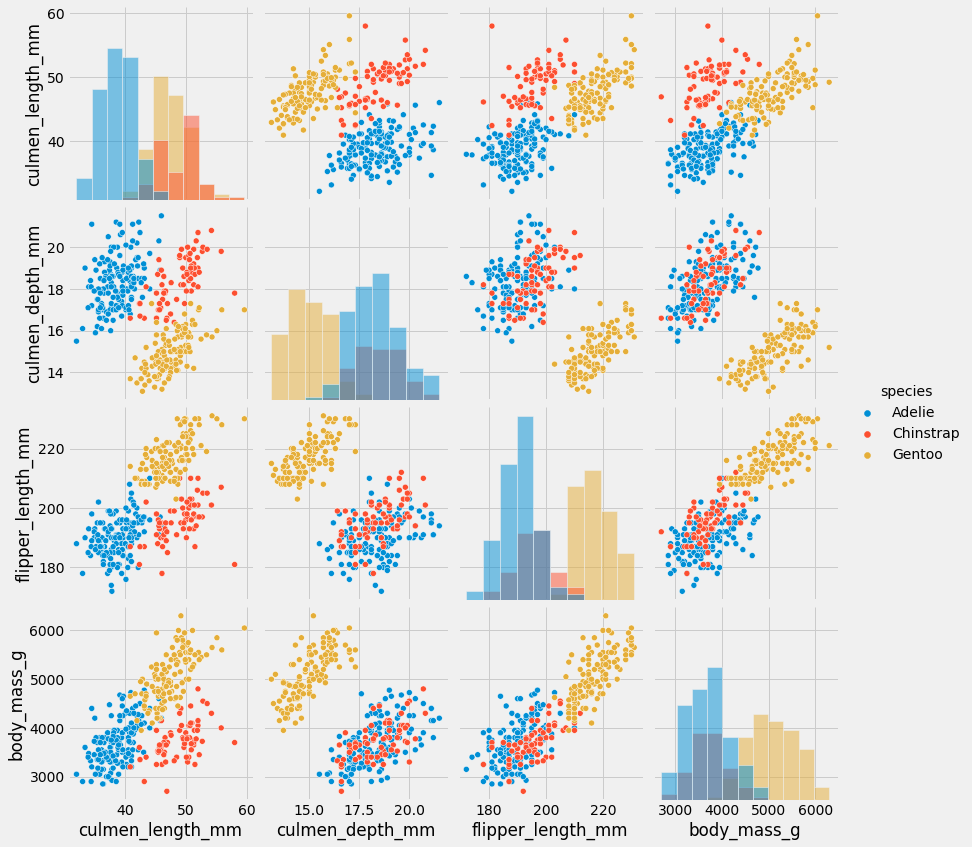

In [ ]:
print('Pairplot')
sns.pairplot(data=data[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind="hist")
plt.show()

***
**Insight**
***
Apa kesimpulan yang dapat kamu ambil dari pairplot di atas?

#**Module 3: Machine Learning**

##**Data Encoding**

Lakukan data encoding pada kolom 'species' dan 'island'!

In [ ]:
#input your code here
data['species'] = data['species'].astype('category')
data['island'] = data['island'].astype('category')

**Data species**

In [ ]:
data['species']

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 341, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [ ]:
data['species'] = data['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo' : 2})

In [ ]:
data['species']

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 341, dtype: category
Categories (3, int64): [0, 1, 2]

**Data island**

In [ ]:
data['island']

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 341, dtype: category
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']

In [ ]:
data['island'] = data['island'].map({'Biscoe': 0, 'Dream': 1, 'Torgersen' : 2})

In [ ]:
data['island']

0      2
1      2
2      2
4      2
5      2
      ..
338    0
340    0
341    0
342    0
343    0
Name: island, Length: 341, dtype: category
Categories (3, int64): [0, 1, 2]

In [ ]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,MALE
1,0,2,39.5,17.4,186.0,3800.0,FEMALE
2,0,2,40.3,18.0,195.0,3250.0,FEMALE
4,0,2,36.7,19.3,193.0,3450.0,FEMALE
5,0,2,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,FEMALE
340,2,0,46.8,14.3,215.0,4850.0,FEMALE
341,2,0,50.4,15.7,222.0,5750.0,MALE
342,2,0,45.2,14.8,212.0,5200.0,FEMALE


Data encoding untuk kolom 'sex', kodekan male sebagai 0 dan female sebagai 1!

In [ ]:
#input your code here
data['sex'] = data['sex'].map({'MALE': 0, 'FEMALE': 1})

In [ ]:
data['sex']

0      0
1      1
2      1
4      1
5      0
      ..
338    1
340    1
341    0
342    1
343    0
Name: sex, Length: 341, dtype: int64

In [ ]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,0
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,1
340,2,0,46.8,14.3,215.0,4850.0,1
341,2,0,50.4,15.7,222.0,5750.0,0
342,2,0,45.2,14.8,212.0,5200.0,1


***
**Insight**
***
Bagaimana dataset setelah dilakukan encoding?Kolom species, island, dan sex merupakan kolom yang memiliki data categorical. Data categorical merupakan kumpulan informasi yang berbentuk kelompok/group. Label encoding mengubah setiap nilai dalam kolom menjadi angka yang berurutan. Seperti pada kasus ini dilakukan encoding untuk mengubah data categorical dari ketiga kolom diatas menjadi kolom dengan angka yang berurutan. Contohnya pada kolom sex, yang awalnya memiliki kolom dengan kategori **Male dan Female** diubah menjadi angka, **Male = 0, Female = 1**. Begitu juga untuk kolom island dan species

##**Memisahkan Variabel Dependen dan Independen**

Variabel dependen yang digunakan adalah data pada kolom 'sex', kolom lainnya merupakan variabel independen

Pisahkan variabel independen sebagai X dan independen sebagai y!

In [ ]:
x = data.drop(columns=['sex'])
y = data['sex']

In [ ]:
x

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.1,18.7,181.0,3750.0
1,0,2,39.5,17.4,186.0,3800.0
2,0,2,40.3,18.0,195.0,3250.0
4,0,2,36.7,19.3,193.0,3450.0
5,0,2,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0
340,2,0,46.8,14.3,215.0,4850.0
341,2,0,50.4,15.7,222.0,5750.0
342,2,0,45.2,14.8,212.0,5200.0


In [ ]:
y

0      0
1      1
2      1
4      1
5      0
      ..
338    1
340    1
341    0
342    1
343    0
Name: sex, Length: 341, dtype: int64

##**Scaling the Data**

Lakukan scaling pada x!

In [ ]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scaling untuk semua kolom
scale = StandardScaler()
scaled_data = scale.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data
print(scaled_data)

      species    island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0   -1.027228  1.849750         -0.882909         0.782767          -1.415644   
1   -1.027228  1.849750         -0.809642         0.123947          -1.059382   
2   -1.027228  1.849750         -0.663108         0.428018          -0.418111   
3   -1.027228  1.849750         -1.322510         1.086838          -0.560616   
4   -1.027228  1.849750         -0.846275         1.745658          -0.774373   
..        ...       ...               ...              ...                ...   
336  1.218187 -0.916762          0.600745        -1.751157           0.935683   
337  1.218187 -0.916762          0.527478        -1.447086           1.006935   
338  1.218187 -0.916762          1.186880        -0.737587           1.505702   
339  1.218187 -0.916762          0.234411        -1.193694           0.793178   
340  1.218187 -0.916762          1.095297        -0.534873           0.864431   

     body_mass_g       sex 

In [ ]:
#Scaling untuk kolom x
scale = StandardScaler()
scaled_data = scale.fit_transform(x)
scaled_data = pd.DataFrame(scaled_data)
print(scaled_data)


            0         1         2         3         4         5
0   -1.027228  1.849750 -0.882909  0.782767 -1.415644 -0.561437
1   -1.027228  1.849750 -0.809642  0.123947 -1.059382 -0.499025
2   -1.027228  1.849750 -0.663108  0.428018 -0.418111 -1.185561
3   -1.027228  1.849750 -1.322510  1.086838 -0.560616 -0.935911
4   -1.027228  1.849750 -0.846275  1.745658 -0.774373 -0.686262
..        ...       ...       ...       ...       ...       ...
336  1.218187 -0.916762  0.600745 -1.751157  0.935683  0.905254
337  1.218187 -0.916762  0.527478 -1.447086  1.006935  0.811636
338  1.218187 -0.916762  1.186880 -0.737587  1.505702  1.935059
339  1.218187 -0.916762  0.234411 -1.193694  0.793178  1.248522
340  1.218187 -0.916762  1.095297 -0.534873  0.864431  1.498172

[341 rows x 6 columns]


##**Spltting Dataset**

Pisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#input your code here
x = data.iloc[:, 0:6]
y = data.iloc[:, 6]

In [ ]:
x

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.1,18.7,181.0,3750.0
1,0,2,39.5,17.4,186.0,3800.0
2,0,2,40.3,18.0,195.0,3250.0
4,0,2,36.7,19.3,193.0,3450.0
5,0,2,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0
340,2,0,46.8,14.3,215.0,4850.0
341,2,0,50.4,15.7,222.0,5750.0
342,2,0,45.2,14.8,212.0,5200.0


In [ ]:
y

0      0
1      1
2      1
4      1
5      0
      ..
338    1
340    1
341    0
342    1
343    0
Name: sex, Length: 341, dtype: int64

In [ ]:
#Data dibagi menjadi 2 bagian data 80% untuk data training, dan 20% untuk data test, sehingga padatest_size=0.2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
) 
# random_state = 0 akan memastikan bahwa pembagian data menjadi set pelatihan dan pengujian tetap konsisten setiap kali program dijalankan.
# berisi set pelatihan dan pengujian untuk data input dan output yang diberikan
# Data pelatihan akan digunakan untuk melatih model, sedangkan data pengujian akan digunakan untuk menguji model tersebut.

In [ ]:
print(x_train.shape)
print(y_train.shape)

(272, 6)
(272,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(69, 6)
(69,)


In [ ]:
x_train

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
117,0,2,37.3,20.5,199.0,3775.0
67,0,0,41.1,19.1,188.0,4100.0
136,0,1,35.6,17.5,191.0,3175.0
13,0,2,38.6,21.2,191.0,3800.0
192,1,1,49.0,19.5,210.0,3950.0
...,...,...,...,...,...,...
324,2,0,47.3,13.8,216.0,4725.0
193,1,1,46.2,17.5,187.0,3650.0
118,0,2,35.7,17.0,189.0,3350.0
48,0,1,36.0,17.9,190.0,3450.0


Setelah data di split menjadi 80% training set dan 20% test set (80:20), selanjutnya masuk ke analisis regresi linear

In [ ]:
from sklearn.linear_model import LinearRegression
regres = LinearRegression()
regres.fit(x_train, y_train)

LinearRegression()

In [ ]:
regres.intercept_

6.385556202998556

In [ ]:
regres.coef_

array([ 0.26886004,  0.01983631, -0.02388783, -0.1279734 , -0.00538867,
       -0.00043718])

In [ ]:
y_pred = regres.predict(x_test)
y_pred

array([ 0.12652969,  1.10696539,  0.30852522,  0.51022462,  0.58186798,
       -0.19192663,  0.72334174, -0.27561856,  1.30233866,  0.12794319,
        0.64587273,  0.18473625,  0.77714166,  0.32682824,  0.07759751,
       -0.11404504,  0.36950466, -0.14759275, -0.02678807,  0.16236026,
        0.12473902,  0.05732461,  0.10594975,  0.19538643,  0.54808533,
       -0.06835992,  0.40856019,  0.72072821,  0.52279108,  0.62242084,
        0.73513263,  0.61929079,  0.60858685,  0.03848598,  0.29164069,
        0.36468181,  0.66568272,  0.20683558,  0.5971174 ,  0.60527914,
        0.41870999,  1.09745545,  0.62368322,  0.19548678,  0.19769357,
        0.82669501,  0.99599939,  0.94903628,  1.11813873,  1.09022496,
        0.66012607,  0.73792254,  0.92667665,  0.13487666,  0.39628342,
        0.05632324,  0.39116334, -0.09784708,  0.17576136,  0.28619332,
        0.64205754, -0.18097226,  0.88551324,  0.83413671,  0.35741275,
        0.76177782,  0.35600894,  0.43297021,  0.42451081])

In [ ]:
predicActual = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
predicActual

,Actual,Predicted
75,0,0.126530
102,1,1.106965
57,0,0.308525
16,1,0.510225
162,1,0.581868
...,...,...
77,0,0.357413
312,1,0.761778
154,0,0.356009
23,0,0.432970


##**Model Fitting**

Build model klasifikasi machine learning menggunakan model Decision Tree!

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
!pip install graphviz
import graphviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Bagi data menjadi data train dan data tes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
117,0,2,37.3,20.5,199.0,3775.0
67,0,0,41.1,19.1,188.0,4100.0
136,0,1,35.6,17.5,191.0,3175.0
13,0,2,38.6,21.2,191.0,3800.0
192,1,1,49.0,19.5,210.0,3950.0
...,...,...,...,...,...,...
324,2,0,47.3,13.8,216.0,4725.0
193,1,1,46.2,17.5,187.0,3650.0
118,0,2,35.7,17.0,189.0,3350.0
48,0,1,36.0,17.9,190.0,3450.0


In [ ]:
#Buat model klasifikasi menggunakan decision tree dan lakukan penyesuaian ke data training
model = DecisionTreeClassifier()
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', 
random_state = 10, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=10)

In [ ]:
#Memprediksi nilai kumpulan data uji menggunakan model diatas
y_pred = clf_entropy.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0])

In [ ]:
#ekspor grafik dari tree di atas yang dilatih di seluruh dataset data, hasilnya disimpan dalam file keluaran data.pdf
from sklearn import tree
dc_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dc_data)
graph.render('data')

'data.pdf'

In [ ]:
hasil_prediksi  = model.predict(x_test)
from sklearn.metrics import accuracy_score
#Nilai akurasi diambil berdasarkan hasil prediksi x_test
print(accuracy_score (y_test, y_pred))

0.8115942028985508


[Text(0.5, 0.875, 'x[5] <= 3712.5\nentropy = 1.0\nsamples = 272\nvalue = [138, 134]'),
 Text(0.25, 0.625, 'x[3] <= 18.55\nentropy = 0.71\nsamples = 98\nvalue = [19, 79]'),
 Text(0.125, 0.375, 'x[3] <= 17.55\nentropy = 0.306\nsamples = 73\nvalue = [4, 69]'),
 Text(0.0625, 0.125, 'entropy = 0.433\nsamples = 45\nvalue = [4, 41]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(0.375, 0.375, 'x[4] <= 194.5\nentropy = 0.971\nsamples = 25\nvalue = [15, 10]'),
 Text(0.3125, 0.125, 'entropy = 0.991\nsamples = 18\nvalue = [8, 10]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.75, 0.625, 'x[3] <= 14.85\nentropy = 0.9\nsamples = 174\nvalue = [119, 55]'),
 Text(0.625, 0.375, 'x[5] <= 5250.0\nentropy = 0.642\nsamples = 49\nvalue = [8, 41]'),
 Text(0.5625, 0.125, 'entropy = 0.359\nsamples = 44\nvalue = [3, 41]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.875, 0.375, 'x[5] <= 5025.0\nentropy = 0.506\nsample

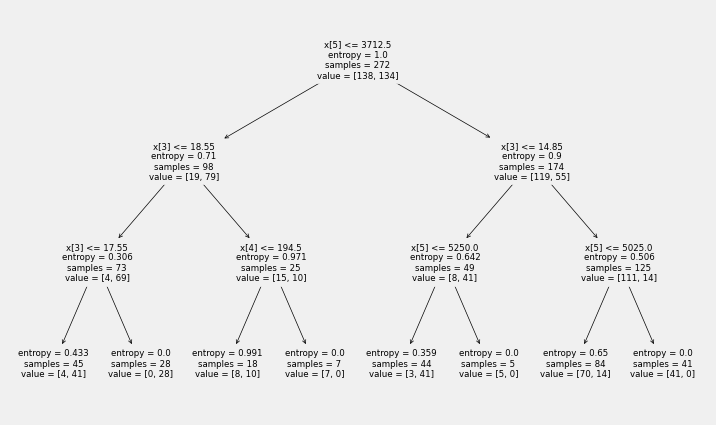

In [ ]:
#display decision tree
from sklearn import tree
tree.plot_tree(clf_entropy) 

**Decision Tree Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, 
                             max_depth=3,
                             random_state=10)

In [ ]:
# Fit RandomForestClassifier
rfc.fit(x_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(x_test)

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1165313289)


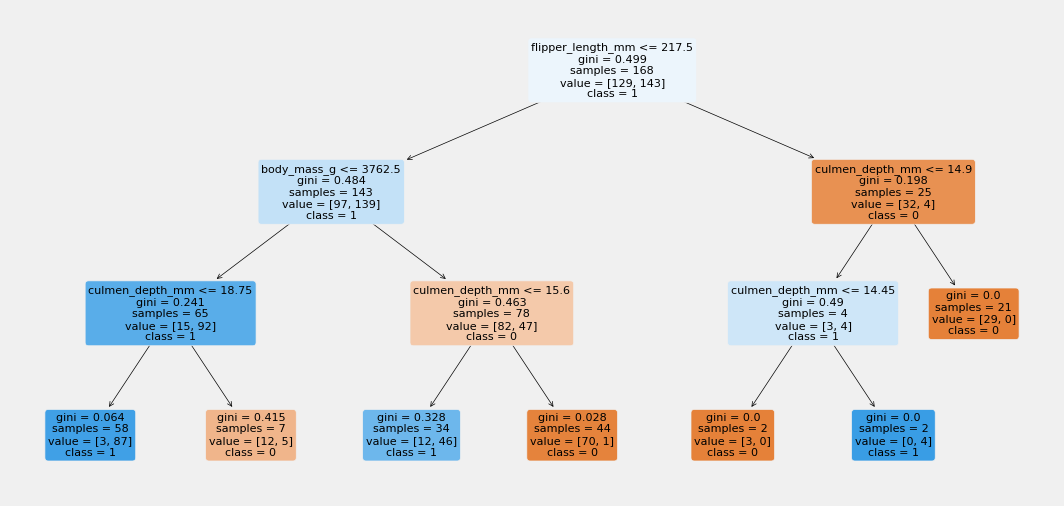

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1283169405)


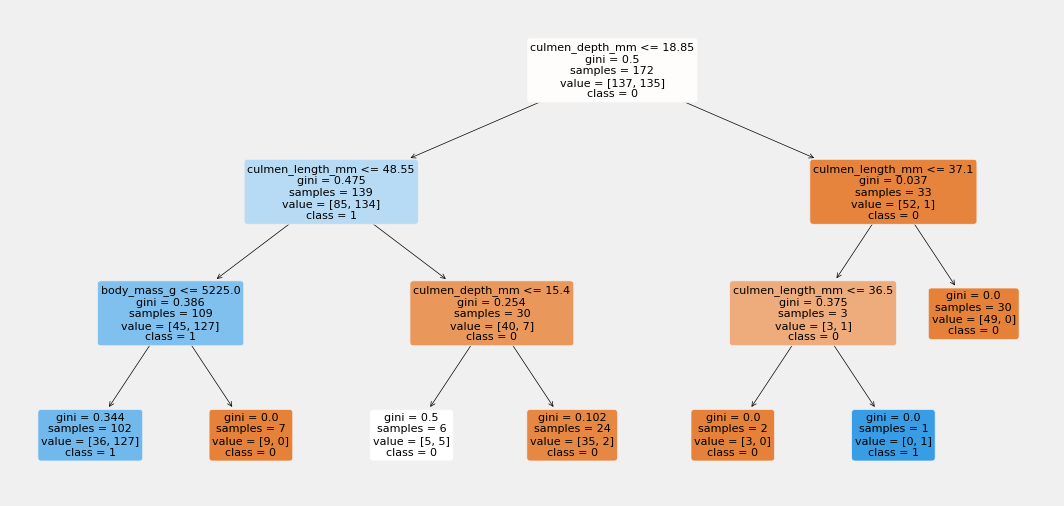

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=89128932)


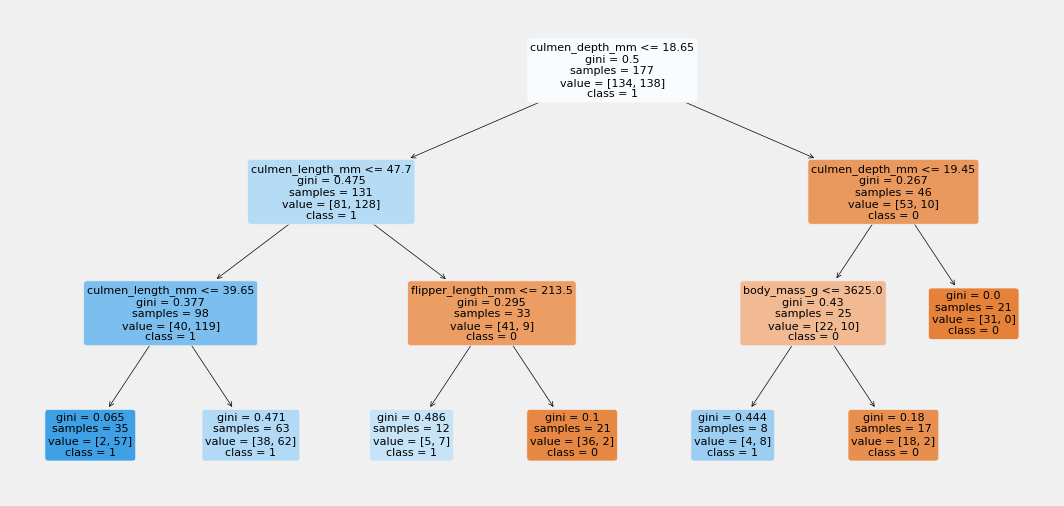

In [ ]:
# Import `tree` module
from sklearn import tree

features = x.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()